# 0. Imports

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns # import the seaborn library
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Read the csv file and change the csv file into dataframe. Then print out the first five rows. 

In [71]:
data_frame = pd.read_csv("iot_dataset-1.csv")
print(data_frame.head())

      x1      x2      x3    x4    x5      x6    y
0  34.40 -16.400  2600.0  26.7  2.92  1950.0  0.0
1  30.40   1.140  1770.0  30.2  1.91  1030.0  1.0
2  19.90  -4.050  2430.0  29.9  2.25  1670.0  0.0
3  30.70   0.231  2330.0  25.6  2.29  1580.0  1.0
4   3.73  12.600   372.0  48.5  0.28  1040.0  0.0


# 2. Change the column names with feature names such as temperature, humidity, light, noise, motion, and device ID. 
The last column is the target column. Change the last column name to “class.” 

In [72]:
column_name = ["temperature","humidity","light","noise", "motion", "device id","class"]
data_frame.columns = column_name
print(data_frame.head())

   temperature  humidity   light  noise  motion  device id  class
0        34.40   -16.400  2600.0   26.7    2.92     1950.0    0.0
1        30.40     1.140  1770.0   30.2    1.91     1030.0    1.0
2        19.90    -4.050  2430.0   29.9    2.25     1670.0    0.0
3        30.70     0.231  2330.0   25.6    2.29     1580.0    1.0
4         3.73    12.600   372.0   48.5    0.28     1040.0    0.0


# 3.  Print out the class distributions to find out about class imbalance.

In [73]:
class_dist = data_frame["class"].value_counts()
class_dist

class
0.0    1000
1.0     999
Name: count, dtype: int64

# 4. Generate the Correlation Matrix plot. After the generation of the plot, create a text box where you need to explain this plot.

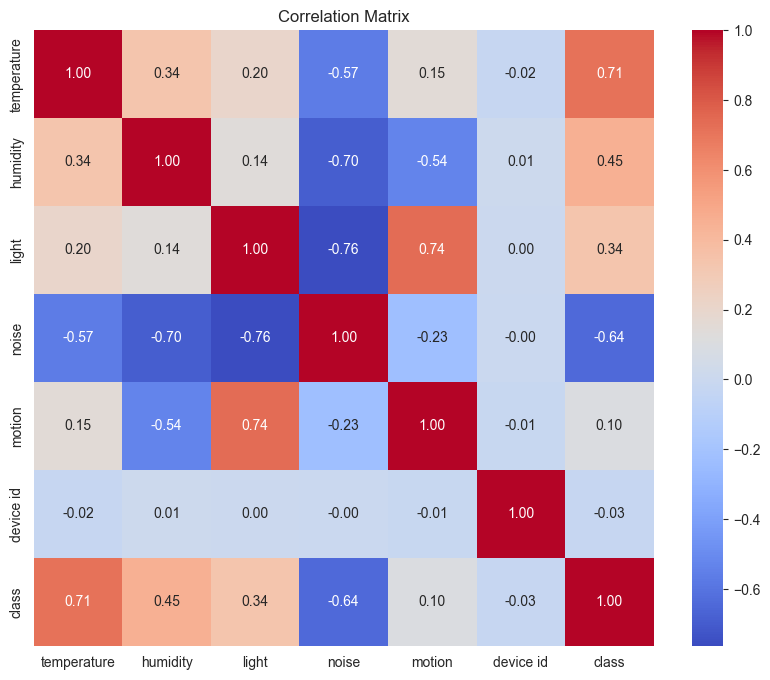

In [74]:
correlation_matrix = data_frame.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Explanation: Class and temperature are shown to have a strong positive correlation, where class and noise have a strong negative correlation. 
Light and motion also have a strong positive correlation, while noise has a strong negative correlation with humidity, light, and temperature.

# 5. Apply scaling to your dataset. After the scaling, print out the first five rows to check the applied scaling. 

In [75]:
#Remove class column so it doesnt get scaled
X = data_frame.drop('class', axis=1)
y = data_frame['class']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data_frame_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Add the column back 
data_frame_scaled['class'] = y

data_frame_scaled.head()

,temperature,humidity,light,noise,motion,device id,class
0,1.031508,-0.928271,1.403794,-0.690312,2.014214,1.576464,0.0
1,0.735717,-0.402084,0.799490,-0.499532,1.085802,-1.618401,1.0
2,-0.040735,-0.557780,1.280021,-0.515885,1.398337,0.604114,0.0
3,0.757901,-0.429353,1.207214,-0.750271,1.435106,0.291573,1.0
4,-1.236470,-0.058292,-0.218362,0.497971,-0.412526,-1.583674,0.0


# 6. Generate a scatter plot of different features. 

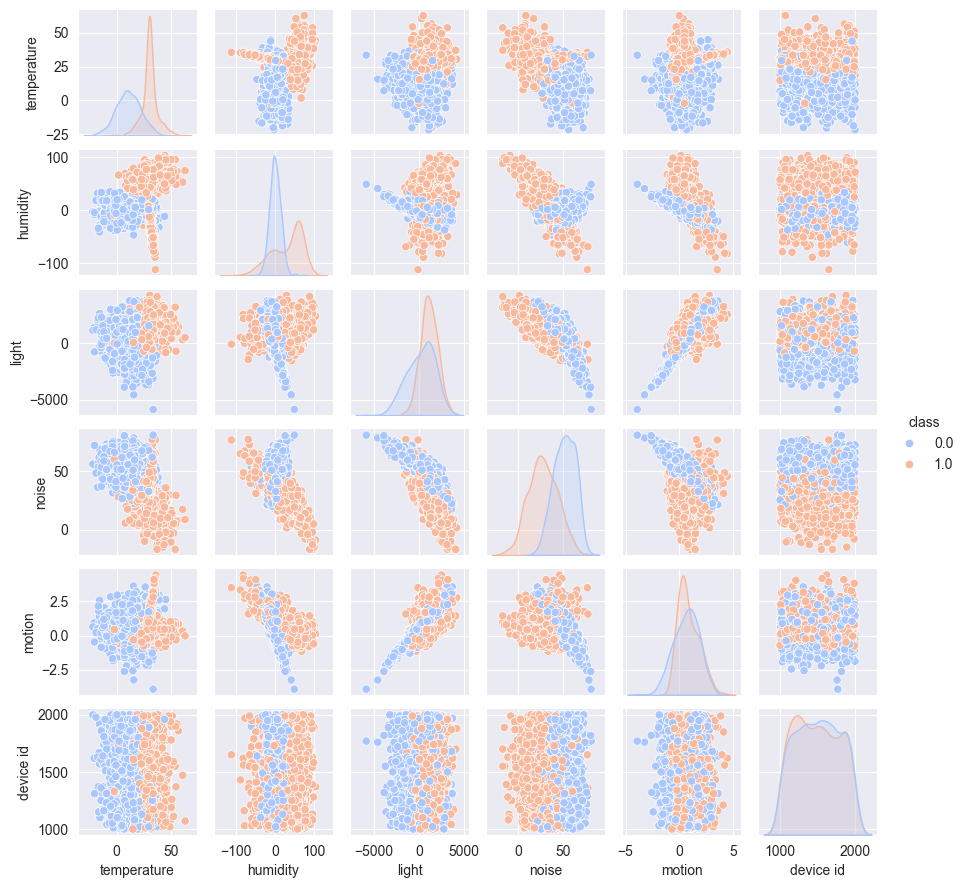

In [81]:
sns.pairplot(data_frame_scaled, hue='class', palette='coolwarm', markers=["o", "o",], height=1.5)
plt.show()

# 7. Generate the plot below to show the class distribution:

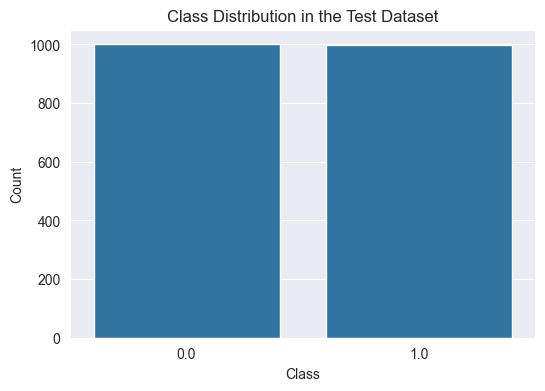

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data_frame)  # Use 'Condition' as the class column
plt.title('Class Distribution in the Test Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 8. Apply (train the model and test the model with test data) the logistic regression algorithm and print out performance metrics. 

In [85]:
# Split the data into features and target
X = data_frame_scaled.drop('class', axis=1)  # Features
y = data_frame_scaled['class']  # Target variable

# Split the data into training and test sets with a smaller test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['0.0', '1.0'])
print(report)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#TODO: ADD EXPLANATION BOX UNDER


              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       500
         1.0       0.89      0.95      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Accuracy: 0.92


# 9. Apply (train the model and test the model with test data) the knn algorithm and print out performance metrics. 

In [87]:
#TODO: ADD EXPLANATION BOX UNDER

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       400
         1.0       0.94      0.98      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800

Accuracy: 0.96


# 10. Apply (train the model and test the model with test data) the SVM model and print out performance metrics. 

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features and target
X = data_frame_scaled.drop('class', axis=1)  # Features
y = data_frame_scaled['class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1)  # You can experiment with kernel and C parameters
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['0.0', '1.0'])
print(report)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       400
         1.0       0.89      0.96      0.92       400

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800

Accuracy: 0.92
